In [1]:
from scipy.integrate import solve_ivp
from scipy.stats import gamma as gamma_dist
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
import sys
sys.path.append("../code")
import model_ramp as model
import plotting

## Germany

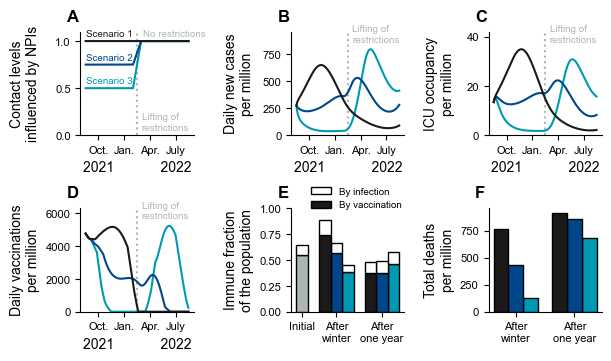

In [3]:
m1 = model.Model.load("./pickle/germany_m1.pickle")
m2 = model.Model.load("./pickle/germany_m2.pickle")
m3 = model.Model.load("./pickle/germany_m3.pickle")
plotting.sixpanels((m1,m2,m3), arial=True, path="./figures/germany.pdf")

## Czech

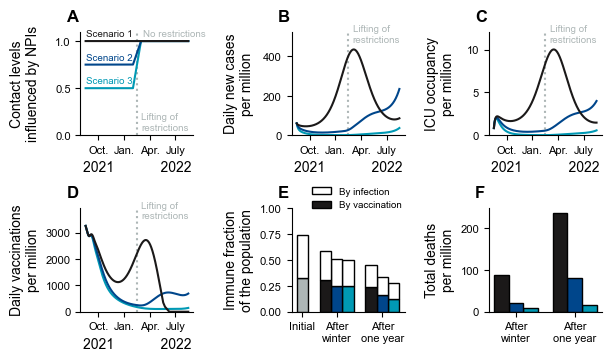

In [4]:
m1 = model.Model.load("./pickle/czech_m1.pickle")
m2 = model.Model.load("./pickle/czech_m2.pickle")
m3 = model.Model.load("./pickle/czech_m3.pickle")
plotting.sixpanels((m1,m2,m3), arial=True, path="./figures/czech.pdf")

## Denmark

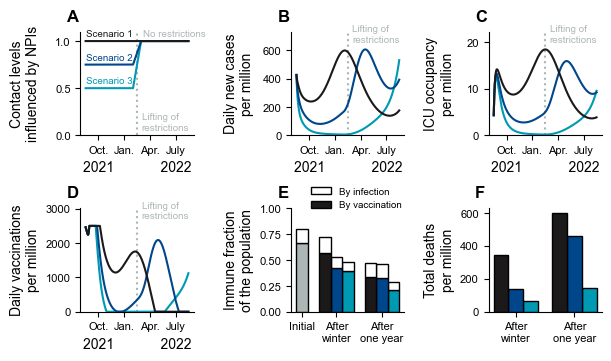

In [5]:
m1 = model.Model.load("./pickle/denmark_m1.pickle")
m2 = model.Model.load("./pickle/denmark_m2.pickle")
m3 = model.Model.load("./pickle/denmark_m3.pickle")
plotting.sixpanels((m1,m2,m3), arial=True, path="./figures/denmark.pdf")

## Portugal

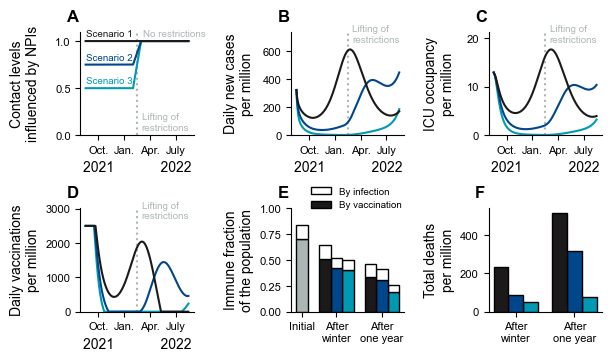

In [6]:
m1 = model.Model.load("./pickle/portugal_m1.pickle")
m2 = model.Model.load("./pickle/portugal_m2.pickle")
m3 = model.Model.load("./pickle/portugal_m3.pickle")
plotting.sixpanels((m1,m2,m3), arial=True, path="./figures/portugal.pdf")

## All in one

In [7]:
ger1 = model.Model.load("./pickle/germany_m1.pickle")
ger2 = model.Model.load("./pickle/germany_m2.pickle")
ger3 = model.Model.load("./pickle/germany_m3.pickle")
cze1 = model.Model.load("./pickle/czech_m1.pickle")
cze2 = model.Model.load("./pickle/czech_m2.pickle")
cze3 = model.Model.load("./pickle/czech_m3.pickle")
dsk1 = model.Model.load("./pickle/denmark_m1.pickle")
dsk2 = model.Model.load("./pickle/denmark_m2.pickle")
dsk3 = model.Model.load("./pickle/denmark_m3.pickle")
por1 = model.Model.load("./pickle/portugal_m1.pickle")
por2 = model.Model.load("./pickle/portugal_m2.pickle")
por3 = model.Model.load("./pickle/portugal_m3.pickle")

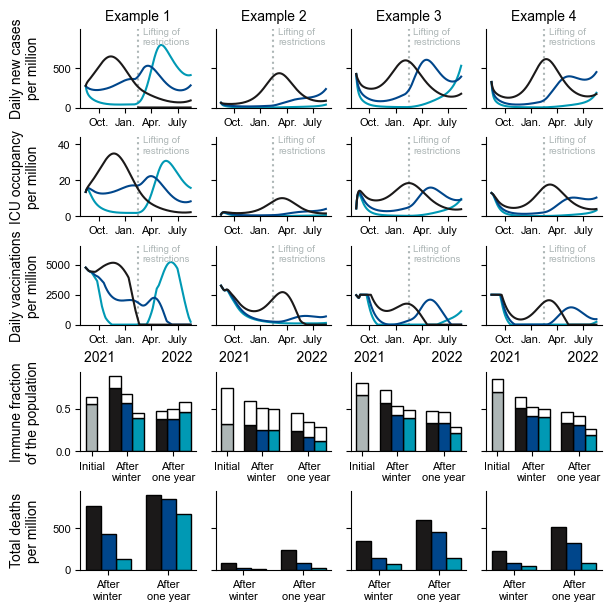

In [8]:
plotting.set_rcParams(arial=True)
mpl.rcParams["legend.fontsize"] = 7

t = ger1.times

fig = plt.figure(figsize=(6., 6.), constrained_layout=True)
#grid = fig.add_gridspec(ncols=4, nrows=5, wspace=0.05)
grid = fig.add_gridspec(ncols=4, nrows=5, wspace=0.1)

ax1 = fig.add_subplot(grid[0])
ax2 = fig.add_subplot(grid[1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(grid[2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(grid[3], sharex=ax1, sharey=ax1)
ax5 = fig.add_subplot(grid[4], sharex=ax1)
ax6 = fig.add_subplot(grid[5], sharex=ax1, sharey=ax5)
ax7 = fig.add_subplot(grid[6], sharex=ax1, sharey=ax5)
ax8 = fig.add_subplot(grid[7], sharex=ax1, sharey=ax5)
ax9 = fig.add_subplot(grid[8], sharex=ax1)
ax10 = fig.add_subplot(grid[9], sharex=ax1, sharey=ax9)
ax11 = fig.add_subplot(grid[10], sharex=ax1, sharey=ax9)
ax12 = fig.add_subplot(grid[11], sharex=ax1, sharey=ax9)
ax13 = fig.add_subplot(grid[12])
ax14 = fig.add_subplot(grid[13], sharey=ax13)
ax15 = fig.add_subplot(grid[14], sharey=ax13)
ax16 = fig.add_subplot(grid[15], sharey=ax13)
ax17 = fig.add_subplot(grid[16])
ax18 = fig.add_subplot(grid[17], sharey=ax17)
ax19 = fig.add_subplot(grid[18], sharey=ax17)
ax20 = fig.add_subplot(grid[19], sharey=ax17)


colors = {
    'low':'#0099B4FF', 'mid':'#00468BFF', 'high':'#1B1919FF', 'free':'#1B1919FF',
    'lowL':'#FFFFFFFF', 'midL':'#FFFFFFFF', 'highL':'#FFFFFFFF',
#        'lowL':'#0099B499', 'midL':'#00468B99', 'highL':'#1B191999',
    'line':'#ADB6B6FF', 'ICUcap':'#FFAAAA',
    'now':'#ADB6B6FF', 'nowL':'#FFFFFFFF',
#        'now':'#93dfedFF', 'nowL':'#93dfed99',
}
main_colors = [colors['low'],colors['mid'],colors['high']]
main_colors_L = [colors['lowL'],colors['midL'],colors['highL']]



ax1.plot(t[1800:], np.ones(1800), color=colors['free'])

for i,m in enumerate([ger1,ger2,ger3]):
    ax1.plot(t, m.rho*(m.chopped_data()[:,3]+m.chopped_data()[:,4]), color=main_colors[i])
    ax5.plot(t, m.chopped_data()[:,7], color=main_colors[i])
    d1a = np.array(list(map(m.Phi, t+m.tau_vac1, m.chopped_data()[:,9])))*m.M
    d1b = np.array(list(map(m.Phi, t+m.tau_vac1/2., m.chopped_data()[:,9])))*m.M
    d2 = np.array(list(map(m.phi, t+m.tau_vac2, m.chopped_data()[:,10])))*m.M
    ax9.plot(t, d1a+d1b+d2, color=main_colors[i])
for i,m in enumerate([cze1,cze2,cze3]):
    ax2.plot(t, m.rho*(m.chopped_data()[:,3]+m.chopped_data()[:,4]), color=main_colors[i])
    ax6.plot(t, m.chopped_data()[:,7], color=main_colors[i])
    d1a = np.array(list(map(m.Phi, t+m.tau_vac1, m.chopped_data()[:,9])))*m.M
    d1b = np.array(list(map(m.Phi, t+m.tau_vac1/2., m.chopped_data()[:,9])))*m.M
    d2 = np.array(list(map(m.phi, t+m.tau_vac2, m.chopped_data()[:,10])))*m.M
    ax10.plot(t, d1a+d1b+d2, color=main_colors[i])
for i,m in enumerate([dsk1,dsk2,dsk3]):
    ax3.plot(t, m.rho*(m.chopped_data()[:,3]+m.chopped_data()[:,4]), color=main_colors[i])
    ax7.plot(t, m.chopped_data()[:,7], color=main_colors[i])
    d1a = np.array(list(map(m.Phi, t+m.tau_vac1, m.chopped_data()[:,9])))*m.M
    d1b = np.array(list(map(m.Phi, t+m.tau_vac1/2., m.chopped_data()[:,9])))*m.M
    d2 = np.array(list(map(m.phi, t+m.tau_vac2, m.chopped_data()[:,10])))*m.M
    ax11.plot(t, d1a+d1b+d2, color=main_colors[i])
for i,m in enumerate([por1,por2,por3]):
    ax4.plot(t, m.rho*(m.chopped_data()[:,3]+m.chopped_data()[:,4]), color=main_colors[i])
    ax8.plot(t, m.chopped_data()[:,7], color=main_colors[i])
    d1a = np.array(list(map(m.Phi, t+m.tau_vac1, m.chopped_data()[:,9])))*m.M
    d1b = np.array(list(map(m.Phi, t+m.tau_vac1/2., m.chopped_data()[:,9])))*m.M
    d2 = np.array(list(map(m.phi, t+m.tau_vac2, m.chopped_data()[:,10])))*m.M
    ax12.plot(t, d1a+d1b+d2, color=main_colors[i])

for ax,m in zip([ax13,ax14,ax15,ax16], [ger1,cze1,dsk1,por1]):
    ax.bar(1, m.chopped_data()[0,1]/1e6, 0.5,
        align='center', color=colors['now'], edgecolor='black', zorder=-1)
    ax.bar(1, m.chopped_data()[0,8]/1e6, 0.5,
        align='center', color=colors['nowL'], edgecolor='black', zorder=-1, bottom=m.chopped_data()[0,1]/1e6)

offset = 0.5
for i in [2,4]:
    for ab,m,j in zip([0.5,0,-0.5],[ger1,ger2,ger3],[0,1,2]):
        ax13.bar(offset+i+ab, m.chopped_data()[900*i-1,1]/1e6, 0.5,  
            align='center', color=main_colors[j], edgecolor='black', zorder=-1)
        ax13.bar(offset+i+ab, m.chopped_data()[900*i-1,8]/1e6, 0.5,
            align='center', color=main_colors_L[j], edgecolor='black', zorder=-1, bottom=m.chopped_data()[900*i-1,1]/1e6)
        ax17.bar(offset+i+ab, m.chopped_data()[900*i-1,11], 0.5, 
            align='center', color=main_colors[j], edgecolor='black', zorder=-3)
    for ab,m,j in zip([0.5,0,-0.5],[cze1,cze2,cze3],[0,1,2]):
        ax14.bar(offset+i+ab, m.chopped_data()[900*i-1,1]/1e6, 0.5,  
            align='center', color=main_colors[j], edgecolor='black', zorder=-1)
        ax14.bar(offset+i+ab, m.chopped_data()[900*i-1,8]/1e6, 0.5,
            align='center', color=main_colors_L[j], edgecolor='black', zorder=-1, bottom=m.chopped_data()[900*i-1,1]/1e6)
        ax18.bar(offset+i+ab, m.chopped_data()[900*i-1,11], 0.5, 
            align='center', color=main_colors[j], edgecolor='black', zorder=-3)
    for ab,m,j in zip([0.5,0,-0.5],[dsk1,dsk2,dsk3],[0,1,2]):
        ax15.bar(offset+i+ab, m.chopped_data()[900*i-1,1]/1e6, 0.5,  
            align='center', color=main_colors[j], edgecolor='black', zorder=-1)
        ax15.bar(offset+i+ab, m.chopped_data()[900*i-1,8]/1e6, 0.5,
            align='center', color=main_colors_L[j], edgecolor='black', zorder=-1, bottom=m.chopped_data()[900*i-1,1]/1e6)
        ax19.bar(offset+i+ab, m.chopped_data()[900*i-1,11], 0.5, 
            align='center', color=main_colors[j], edgecolor='black', zorder=-3)
    for ab,m,j in zip([0.5,0,-0.5],[por1,por2,por3],[0,1,2]):
        ax16.bar(offset+i+ab, m.chopped_data()[900*i-1,1]/1e6, 0.5,  
            align='center', color=main_colors[j], edgecolor='black', zorder=-1)
        ax16.bar(offset+i+ab, m.chopped_data()[900*i-1,8]/1e6, 0.5,
            align='center', color=main_colors_L[j], edgecolor='black', zorder=-1, bottom=m.chopped_data()[900*i-1,1]/1e6)
        ax20.bar(offset+i+ab, m.chopped_data()[900*i-1,11], 0.5, 
            align='center', color=main_colors[j], edgecolor='black', zorder=-3)



for ax in [ax9,ax10,ax11,ax12]:
    ax.set_xlabel('2021            2022')


for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax17,ax18,ax19,ax20]:
    ax.set_ylim(0,None)
for ax in [ax13,ax14,ax15,ax16]:
    ax.set_ylim(0,None)

ax1.set_title("Example 1")
ax2.set_title("Example 2")
ax3.set_title("Example 3")
ax4.set_title("Example 4")

ax1.set_ylabel("Daily new cases\nper million")
ax5.set_ylabel("ICU occupancy\nper million")
ax9.set_ylabel("Daily vaccinations\nper million")
ax13.set_ylabel("Immune fraction\nof the population")
ax17.set_ylabel("Total deaths\nper million")

#Lifting of restrictions
for ax in [ax1,ax5,ax9]:
    l,u = ax.get_ylim()
    ax.set_ylim(l,u+0.2*(u-l))
for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]:
    ax.axvline(180, ls=':', color=colors['line'], zorder=0)
    ax.text(0.54,0.8,'Lifting of\nrestrictions', size=7, color=colors['line'], transform=ax.transAxes)

#for ax, label in zip([ax1,ax2,ax3,ax4,ax5,ax6], ['A','B','C','D','E','F']):
#    ax.text(-.12,1.1,label, size=12, weight='bold', color='black', transform=ax.transAxes)

ax1.set_xticks([45, 135, 45+2*90, 45+3*90])
ax1.set_xticklabels(['Oct.','Jan.','Apr.','July'])


immune_xticks = [1,offset+2,offset+4]
immune_xlabels=['Initial','After\nwinter', 'After\none year']
for ax in [ax13,ax14,ax15,ax16]:
    ax.set_xticks(immune_xticks)
    ax.set_xticklabels(immune_xlabels)

deaths_xticks = [offset+2,offset+4]
deaths_xlabels=['After\nwinter', 'After\none year']
for ax in [ax17,ax18,ax19,ax20]:
    ax.set_xticks(deaths_xticks)
    ax.set_xticklabels(deaths_xlabels)
    
for ax in [ax2,ax3,ax4,ax6,ax7,ax8,ax10,ax11,ax12,ax14,ax15,ax16,ax18,ax19,ax20]:
    plt.setp(ax.get_yticklabels(), visible=False)


handles = [mpl.patches.Patch(facecolor=colors['highL'], edgecolor='black', label='By infection'),
           mpl.patches.Patch(facecolor=colors['high'], edgecolor='black', label='By vaccination')]
#ax13.legend(handles=handles, bbox_to_anchor=(0.35,0.9), ncol=1, frameon=False)

fig.align_ylabels()

plt.show()
fig.savefig("./figures/countries.pdf")
